In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [163]:
df = pd.read_csv(r'D:\Pgm\DataScience\Dataset\cars.csv')

In [164]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [165]:
df.tail()

,brand,km_driven,fuel,owner,selling_price
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000
8127,Tata,25000,Diesel,First Owner,290000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [167]:
df.duplicated().sum()

1678

In [168]:
df=df.drop_duplicates()

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 8125
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          6450 non-null   object
 1   km_driven      6450 non-null   int64 
 2   fuel           6450 non-null   object
 3   owner          6450 non-null   object
 4   selling_price  6450 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 302.3+ KB


In [170]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [171]:
df.describe()

,km_driven,selling_price
count,6.450000e+03,6.450000e+03
mean,7.446901e+04,5.242297e+05
std,5.963341e+04,5.341267e+05
min,1.000000e+00,2.999900e+04
25%,3.900000e+04,2.500000e+05
50%,7.000000e+04,4.099990e+05
75%,1.000000e+05,6.400000e+05
max,2.360457e+06,1.000000e+07


In [172]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8121,Maruti,50000,Petrol,Second Owner,260000
8122,Hyundai,80000,Diesel,Second Owner,475000
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000


In [173]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

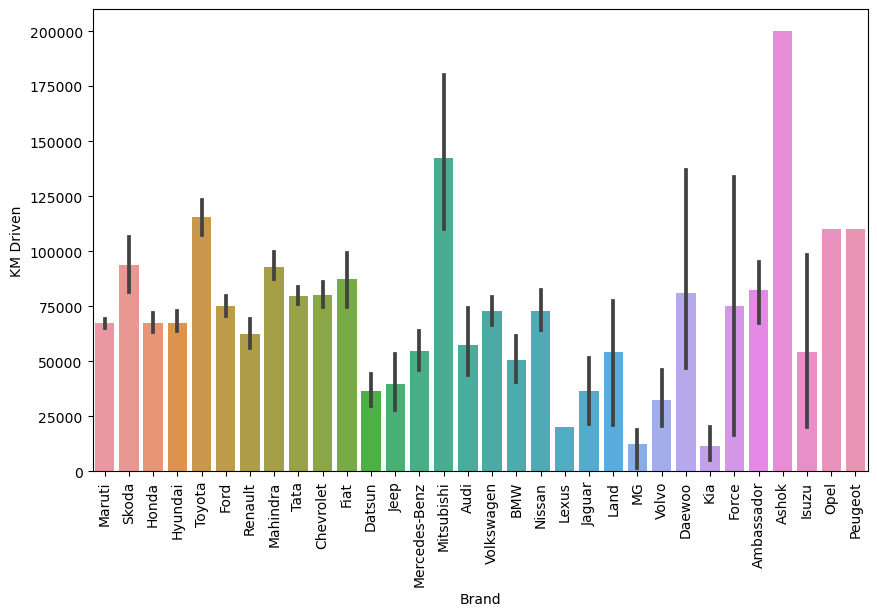

In [174]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['brand'],y=df['km_driven'])
plt.xlabel("Brand")
plt.ylabel("KM Driven")
plt.xticks(rotation=90)
plt.show()

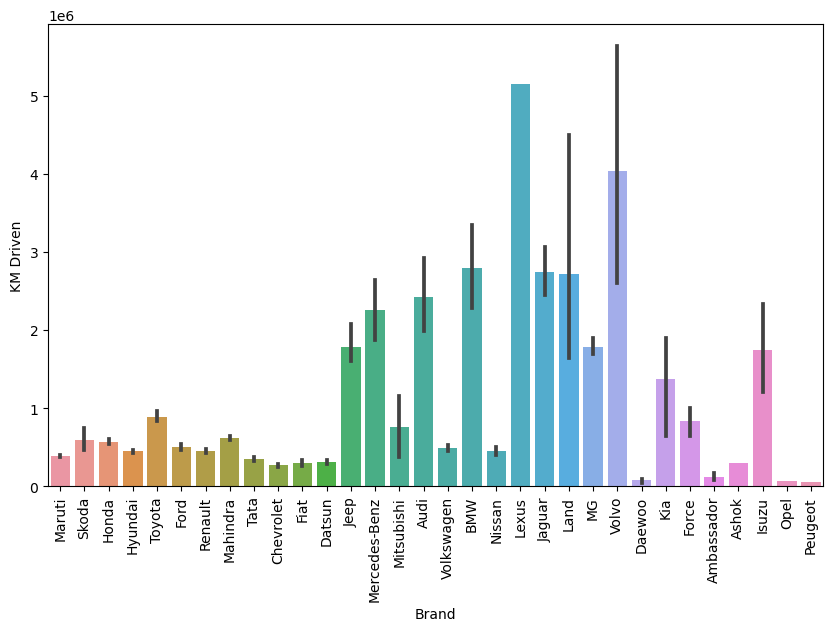

In [329]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['brand'],y=df['selling_price'])
plt.xlabel("Brand")
plt.ylabel("KM Driven")
plt.xticks(rotation=90)
plt.show()

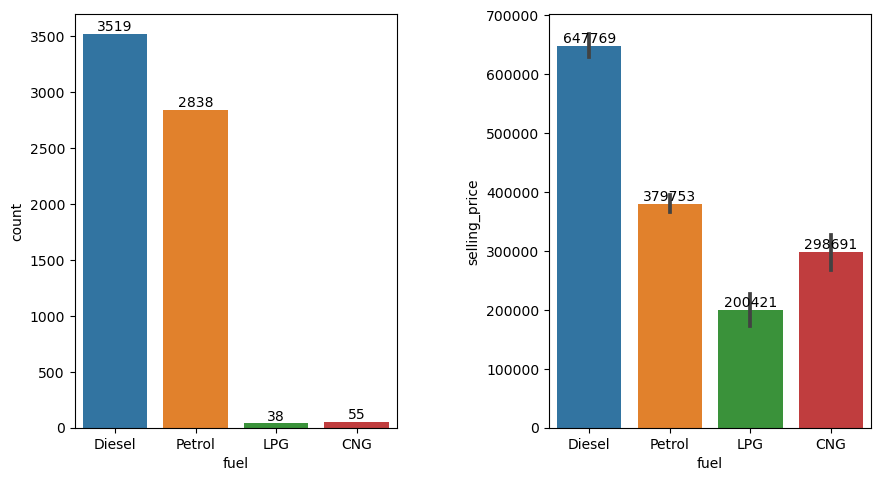

In [328]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ax=sns.countplot(x=df['fuel'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(1,2,2)
ax=sns.barplot(x=df['fuel'],y=df['selling_price'])
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout(pad=5)

In [176]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

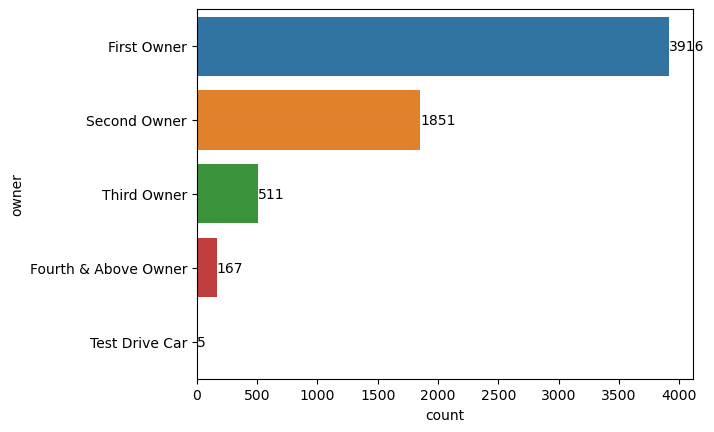

In [177]:
ax=sns.countplot(data=df,y='owner')
for container in ax.containers:
    ax.bar_label(container)

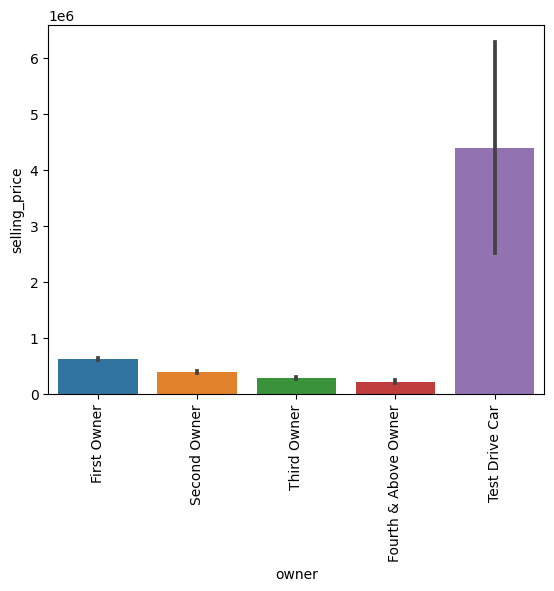

In [325]:
sns.barplot(data=df,x='owner',y='selling_price')
plt.xticks(rotation=90)
plt.show()

In [178]:
owner_fuel_df=df.groupby(['owner','fuel'])

In [179]:
owner_fuel_df.size()

owner                 fuel  
First Owner           CNG         33
                      Diesel    2096
                      LPG         17
                      Petrol    1770
Fourth & Above Owner  CNG          2
                      Diesel      86
                      LPG          2
                      Petrol      77
Second Owner          CNG         17
                      Diesel    1068
                      LPG         14
                      Petrol     752
Test Drive Car        Diesel       1
                      Petrol       4
Third Owner           CNG          3
                      Diesel     268
                      LPG          5
                      Petrol     235
dtype: int64

In [180]:
owner=owner_fuel_df.size().reset_index()['owner'].unique()

In [181]:
owner

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

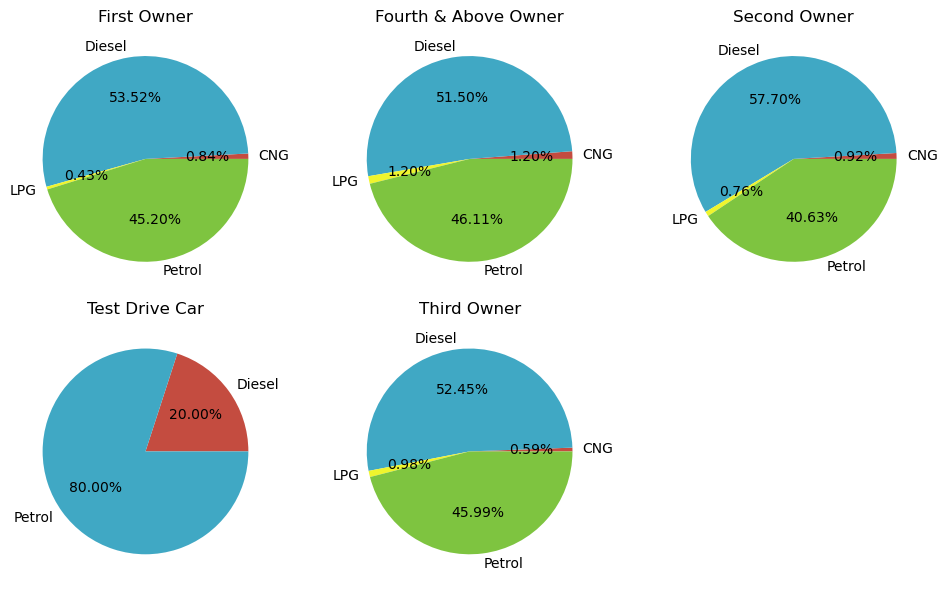

In [182]:
plt.figure(figsize=(10,6))
for count,i in enumerate(owner,start=1):
    label = owner_fuel_df.size()[i].index
    plt.subplot(2,3,count)
    plt.pie(owner_fuel_df.size()[i],labels=label,autopct="%.2f%%",colors=['#c44c40','#40a8c4','#eff52d','#7ec440'])
    plt.title(i)
    plt.tight_layout()

<Axes: >

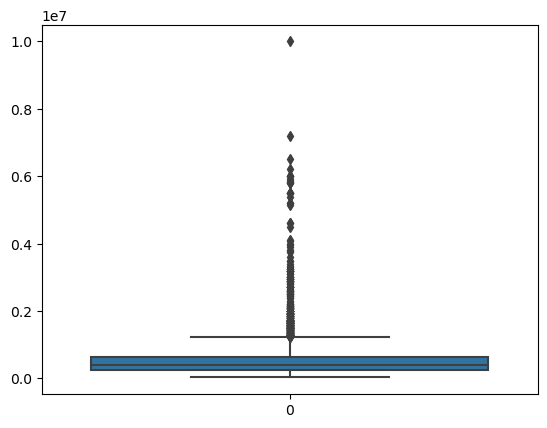

In [321]:
sns.boxplot(df['selling_price'])

In [249]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8121,Maruti,50000,Petrol,Second Owner,260000
8122,Hyundai,80000,Diesel,Second Owner,475000
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000


In [514]:
df1 =df.copy()

In [515]:
df1

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8121,Maruti,50000,Petrol,Second Owner,260000
8122,Hyundai,80000,Diesel,Second Owner,475000
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000


In [516]:
X=df1.drop('selling_price',axis=1)

In [517]:
y=df1['selling_price']

In [518]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [519]:
from sklearn.compose import make_column_transformer

In [520]:
categorical_indices = [0,2,3]

In [521]:
numeric_indices = [1] 

In [580]:
columns_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False,drop='first'),categorical_indices),
    remainder='passthrough',)

In [581]:
x=columns_trans.fit_transform(X)

In [582]:
x.shape

(6450, 39)

In [583]:
# using ordinal Encoder in it

In [584]:
# from sklearn.compose import ColumnTransformer

In [585]:
# transformer = ColumnTransformer(transformers=[
#     ('tnf1',OrdinalEncoder(categories=[['LPG','CNG','Petrol','Diesel']]),['fuel']),
#     ('tnf2',OneHotEncoder(sparse=False,drop='first'),['brand','owner'])
# ],remainder='passthrough')

In [586]:
# x=transformer.fit_transform(X)

In [587]:
# x.shape

In [588]:
from sklearn.model_selection import train_test_split

In [589]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [590]:
X_train.shape

(5160, 39)

In [591]:
X_test.shape

(1290, 39)

In [592]:
y_train.shape

(5160,)

In [593]:
y_test.shape

(1290,)

In [594]:
from sklearn.linear_model import LinearRegression

In [595]:
lr  = LinearRegression()

In [596]:
lr.fit(X_train,y_train)

LinearRegression()

In [597]:
y_pred=lr.predict(X_test)

In [598]:
y_pred

array([ 236588.53911846, 1078788.79955525,  135974.10372022, ...,
        471155.60453333,  379224.75166836,  769324.78514294])

In [599]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [600]:
print("MAE ",mean_absolute_error(y_test,y_pred))
print("MSE ",mean_squared_error(y_test,y_pred))
print("accuracy ",r2_score(y_test,y_pred))

MAE  210221.78236627864
MSE  142608335051.99786
accuracy  0.5151553092480227


In [601]:
from sklearn.ensemble import RandomForestRegressor

In [602]:
rfr = RandomForestRegressor()

In [603]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [604]:
y_pred=rfr.predict(X_test)

In [605]:
print("MAE ",mean_absolute_error(y_test,y_pred))
print("MSE ",mean_squared_error(y_test,y_pred))
print("accuracy ",r2_score(y_test,y_pred))

MAE  200893.16107666126
MSE  125404329815.40521
accuracy  0.5736460741502969


In [606]:
from xgboost import XGBRegressor

In [607]:
xgb = XGBRegressor()

In [608]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [609]:
y_pred=xgb.predict(X_test)

In [610]:
print("MAE ",mean_absolute_error(y_test,y_pred))
print("MSE ",mean_squared_error(y_test,y_pred))
print("accuracy ",r2_score(y_test,y_pred))

MAE  192097.05417877907
MSE  119485881921.94656
accuracy  0.5937678155449311


In [611]:
#hyper parameter tuning

In [612]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [613]:
params = {
    'learning_rate':[0.05,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,8,10,12],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [614]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [615]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [616]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [617]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [618]:
xgb = XGBRegressor(min_child_weight=1,max_depth=5,learning_rate=0.25,gamma=0.1,colsample_bytree=0.3)

In [619]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [620]:
y_pred=xgb.predict(X_test)

In [621]:
print("MAE ",mean_absolute_error(y_test,y_pred))
print("MSE ",mean_squared_error(y_test,y_pred))
print("accuracy ",r2_score(y_test,y_pred))

MAE  188829.76525708576
MSE  114045519472.25833
accuracy  0.6122641457105977


In [622]:
199367

199367

In [623]:
125185231695

125185231695

In [624]:
import pickle

In [625]:
pickle.dump(xgb,open('car_price_pred.pkl','wb'))

In [626]:
pickle.dump(columns_trans,open('car_price_encoder.pkl','wb'))

In [627]:
model= pickle.load(open('car_price_pred.pkl','rb'))

In [628]:
encoder= pickle.load(open('car_price_encoder.pkl','rb'))

In [629]:
#      model   km driven  fuel     owner            price
#eg :  Maruti 	50000 	  Petrol 	Second Owner 	260000

In [638]:
input = ['Maruti',50000,'Petrol','Second Owner']

In [639]:
input

['Maruti', 50000, 'Petrol', 'Second Owner']

In [640]:
transformed_input = encoder.transform([input])

In [641]:
model.predict(transformed_input)

array([240447.25], dtype=float32)